In [1]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Image representation

A digital image is discrete. This means that there is sampling somewhere in the acquisition process (most of the time). A digital image is basically a multidimentionnal array of numbers. Each picture element stores a numerical value. With 2D images one speaks about picture elements or pixels and for 3D images one speaks about volume elements or voxels.

The latice of pixels are usually rectangular or square if pixels are square-shaped, or hexagonal if the pixels are hexagonal-shaped. A hexagonal latice has a unique distance between a pixel and its neighbours. The image dimentionnality will depend on several things :
- the spatial dimentionnality : 1D (profile) or 2D (image) or even 3D (volume),
- the temporal dimension : one dimension is added for time when dealing with sequences (when the image acquisition is sequential),
- the spectral dimension : the number of spectral values associated with one image element (an image can be composed of different spectral band).

The spatial dimension is typically given by the grid step of the sensor. A $640 \times 480$ CMOS sensor will produce a $640 \times 480$ pixels grid. For a flatbed scanner, one dimension will be given by the number of sensor along the acquisition line, while the second dimension will be given by the spacial repetition of a line acquisition.
> The shape of the pixels is not always a square, depending on the sensor geometry and/or the sampling speed (i.e.for the scanners).
One has to pay attention to that, in particular when we will extract measures from images (e.g. distance or surface).

> A time-lapse acquisition of fluorescent confocal microscopy can have five different dimensions :
> - three X,Y and Z spatial dimensions (voxels),
> - one spectral dimension , that is several fluorophore channels (dapi, alexa, GFP, ...),
> - one time dimension (time-lapse).

# Image sampling

Here are some examples of sampling, or more exactly sub-sampling. In this case, the resolution of the image is reduced each time it is sampled, resulting in a "pixelated" image. The more de resolution is reduced, the more "pixelated" the image is.

In order to reduce the harsh aspect of the sub-sampled image, a good technique is to apply a gaussian filter before sampling, reducing the difference of values between the pixels, the reduction of resolution becoming less harsh.

C:\Users\HP\AppData\Local\Temp\ipykernel_8292\1940092013.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
C:\Program Files\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


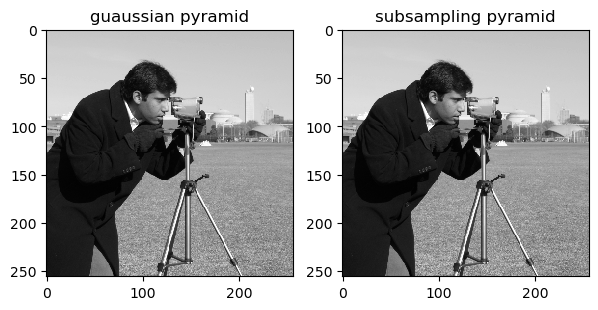

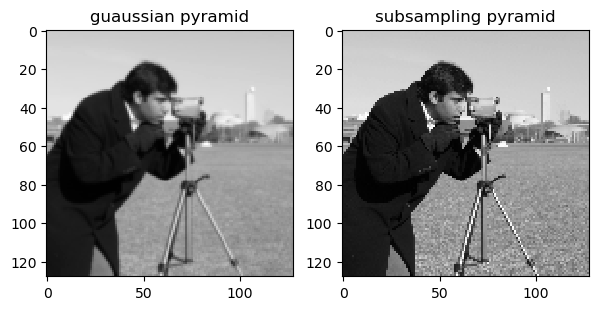

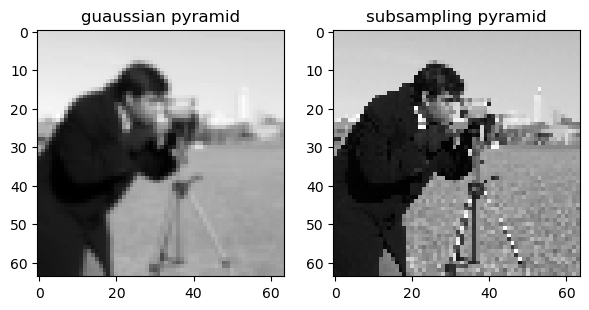

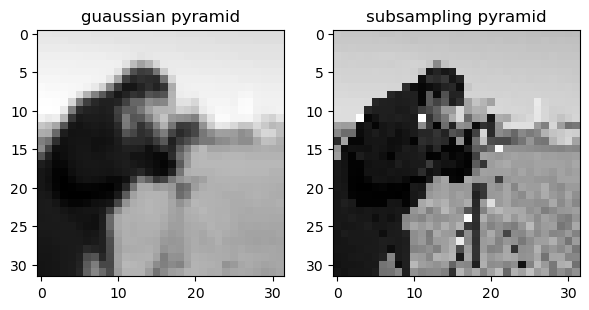

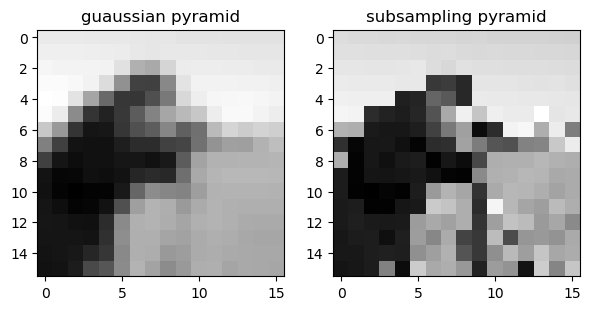

In [2]:
from scipy.ndimage.filters import gaussian_filter
from skimage.data import camera
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def build_gaussian_pyramid(ima,levelmax):
    """return a list of subsampled images (using gaussion pre-filter
    """
    r = [ima]
    current = ima
    for level in range(levelmax):
        lp = gaussian_filter(current,1.0)
        sub = lp[::2,::2]
        current = sub
        r.append(current)
    return r

def build_pyramid(ima,levelmax):
    """return a list of subsampled images (using gaussion pre-filter
    """
    r = [ima]
    current = ima
    for level in range(levelmax):
        sub = current[::2,::2]
        current = sub
        r.append(current)
    return r

im = camera()[::2,::2]

#build filtered and non-filtered pyramids
N = 4
fpyramid = build_gaussian_pyramid(im,N)
nfpyramid = build_pyramid(im,N)

for f,nf in zip(fpyramid,nfpyramid):

    plt.figure(figsize=[7,7])
    plt.subplot(1,2,1)
    plt.imshow(f,cmap=plt.cm.gray,interpolation='nearest')
    plt.title('guaussian pyramid')
    plt.subplot(1,2,2)
    plt.imshow(nf,cmap=plt.cm.gray,interpolation='nearest')
    plt.title('subsampling pyramid');

# Level sampling

Level sampling or quantization changes the amount of possible values for each pixel. In the case of a grayscale image, it settles the number of shades of gray that a pixel can take. As said before, the human eye is only sensitive to a range of a hundred shades : this is why in the example below, there is only a noticable difference at the third image with 60 levels (some artifact ligns appear in the sky of the background).

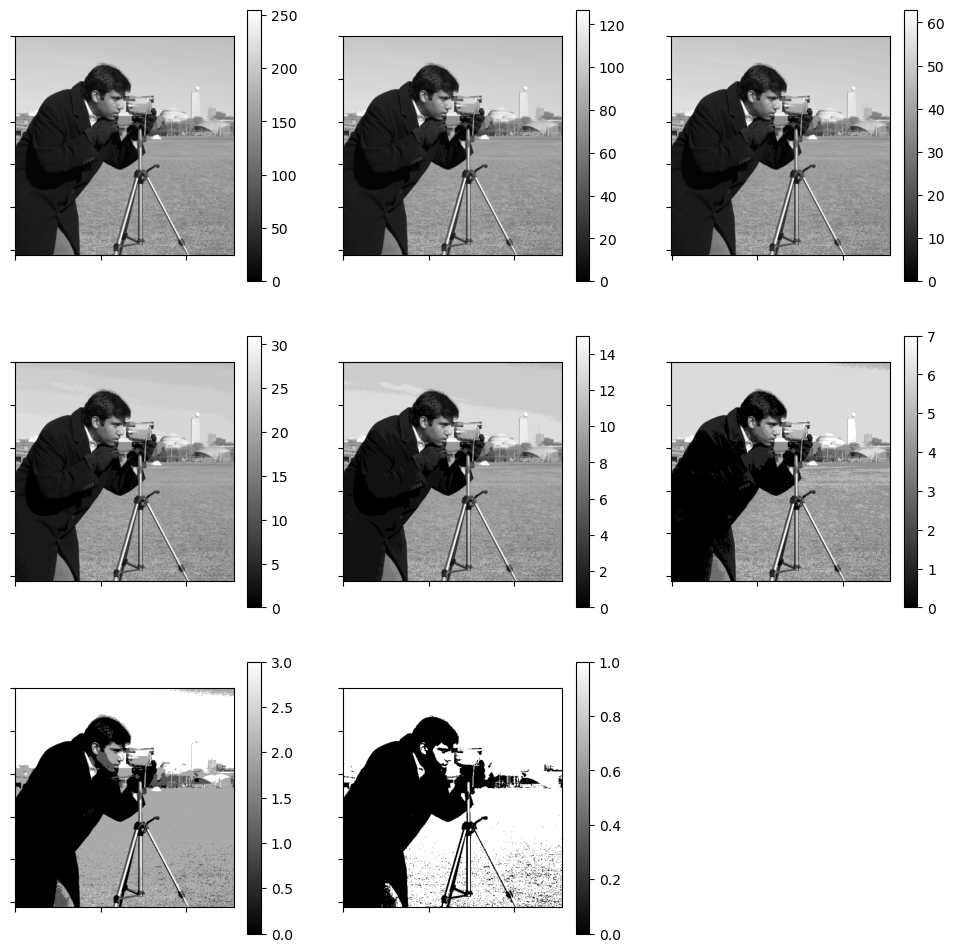

In [3]:
g = camera()
plt.figure(figsize=[12,12])
    
for s in range(0,8):
    g_poster = (g>>s)

    plt.subplot(3,3,s+1)
    plt.imshow(g_poster,cmap=cm.gray)
    plt.colorbar()
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])

# Information

The entropy of a signal is given by the next equation :
$$e = - \displaystyle\sum_i \left( {p_i \cdot \log \left( {p_i} \right)} \right)$$

where $p_i$ is the probability of occurence of a symbol $i$. For a gray scale image, one could consider the gray level distribution as the "probablility" of occurence of a gray level. The example below illustrate how image entropy vary with respect to the graylevel distribution.
> If the logarithm base used is 2, the entropy corresponds to the number of bits required to encode the signal.

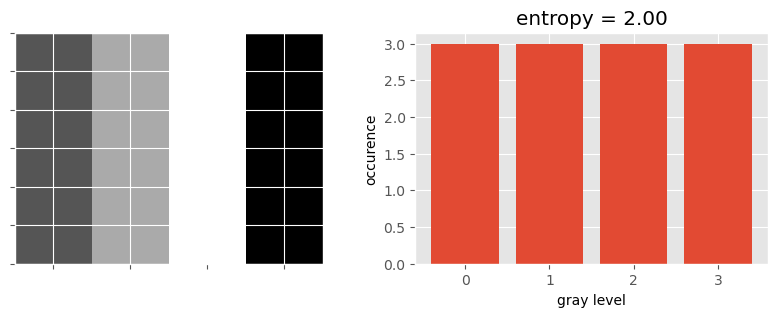

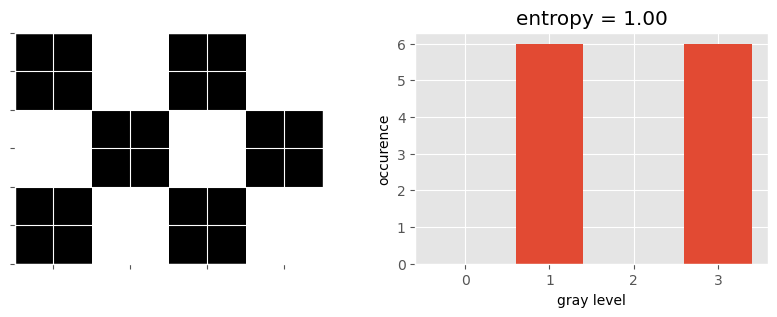

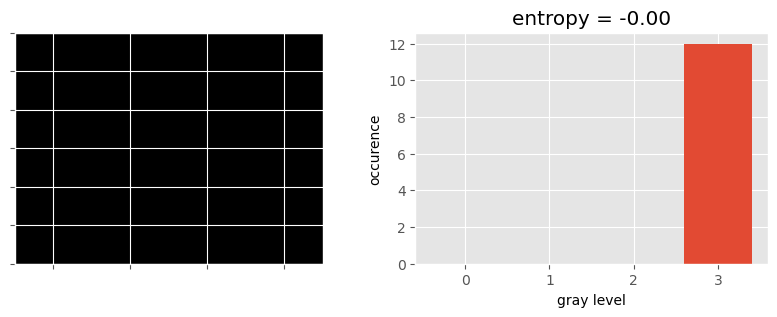

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera
plt.style.use('ggplot')

def display_hist(ima,nbin):
    hist,bins = np.histogram(ima.flatten(),bins=range(0,nbin+1))
    norm_hist = 1.*hist/np.sum(hist) # normalized histogram
    # entropy
    idx = norm_hist>0
    h = -np.sum(norm_hist[idx]*np.log2(norm_hist[idx]))
    
    # display the results
    plt.figure(figsize=[10,3])
    ax = plt.subplot(1,2,1)
    plt.imshow(ima,cmap=cm.gray,interpolation='nearest')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax = plt.subplot(1,2,2)
    plt.bar(bins[:-1],hist,.8)
    if len(bins)<10:
        ax.set_xticks(bins[:-1])
        ax.set_xticklabels( bins[:-1] )
    plt.xlabel('gray level')
    plt.ylabel('occurence');
    plt.title('entropy = %.2f'%h)
    
    
i1 = np.array([[1,2,3,0],[1,2,3,0],[1,2,3,0]])
i2 = np.array([[1,3,1,3],[3,1,3,1],[1,3,1,3]])
i3 = np.array([[3,3,3,3],[3,3,3,3],[3,3,3,3]])

display_hist(i1,4)
display_hist(i2,4)
display_hist(i3,4)

The entropy of the image below is 7.23. This means that we need a bit more than 7 bits to encode graylevels for this image. Which is consistent with the choosen data storage : 8 bit per pixel. Entropy is often known as an information measure.

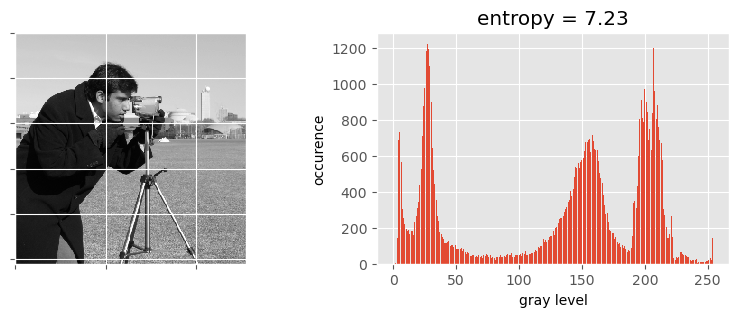

In [5]:
from skimage.data import camera
ima = camera()[::2,::2]
display_hist(ima,255)

But what would be the entropy of an image where all the pixels are randomly permuted ?

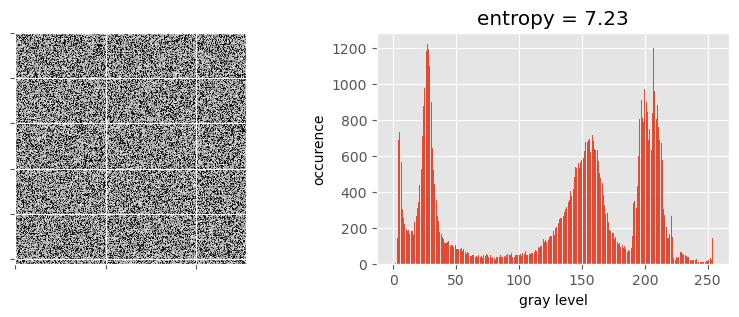

In [6]:
d = ima.flatten()
shuffled_ima = np.random.permutation(d.flatten())
shuffled_ima = shuffled_ima.reshape(ima.shape)

display_hist(shuffled_ima,255)

Since the entropy is computed on the graylevel distribution, nothing changes. So, from an entropical point of view, information carried by the randomized image is the same as the original image ! There is thus something wrong about the way the information is defined here.

In fact, when we shuffle the pixels of the image, we lose the localisation information : pixels that where located close to each other are splitted. In order to take this colocality between pixels, one can use the coocurence matrix. For an image $I$, the coocurance matrix is definded by the following equation.
$$
C^{\Delta x, \Delta y}_{i,j}=\sum_{p=1}^n\sum_{q=1}^m\begin{cases} 1, & \mbox{if }I(p,q)=i\mbox{ and }I(p+\Delta x,q+\Delta y)=j \\ 0, &\mbox{otherwise}\end{cases}
$$

In other words, this matrix counts the number of pixels having a gray level $i$ and its neighbour, defined by the $(\Delta x, \Delta y)$ translation, has a gray level $j$. Usually close pixels share a similar gray level, for small $(\Delta x, \Delta y)$ the matrix is close to the diagonal.
> The diagonal of a coocurence matrix with $(\Delta x, \Delta y) = (0,0)$ contains simply all the pixels of the image.

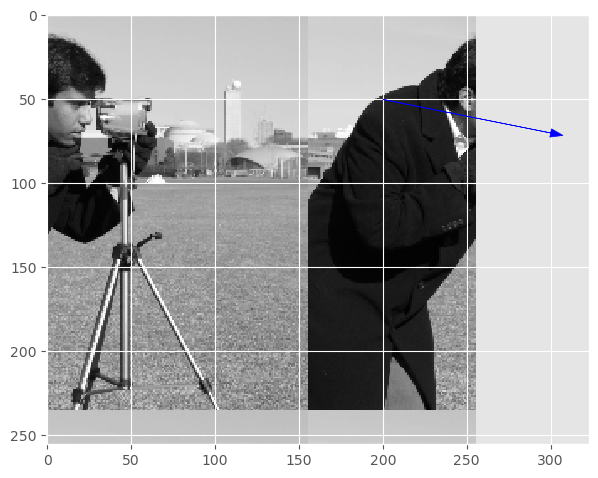

In [7]:
def cooc(im,dx,dy):
    rim = np.roll(im,dy,axis=0)
    rim = np.roll(rim,dx,axis=1)
    G1 = im.flatten()
    G2 = rim.flatten()
    
    histo2D = np.zeros((256,256))

    for g1,g2 in zip(G1,G2):
        histo2D[g1,g2] = histo2D[g1,g2]+1
        
    return histo2D, rim

dx = -100
dy = -20
histo2D,rim = cooc(ima,dx=dx,dy=dy)
plt.figure(figsize=[7,7])
plt.imshow(rim,cmap=cm.gray,interpolation='nearest');
plt.arrow(200,50,-dx,-dy,color='b',head_width=5);

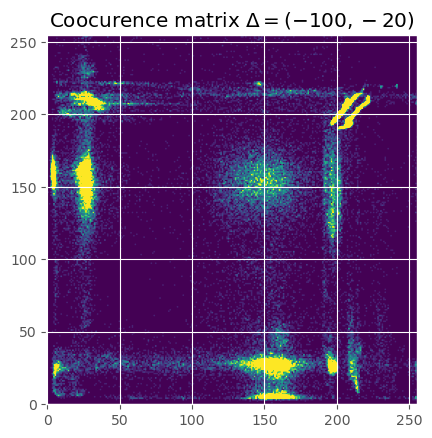

In [8]:
plt.imshow(histo2D,vmax=10)
plt.ylim([0,255])
plt.title('Coocurence matrix $\Delta = (%d,%d)$'%(dx,dy));

If this concept of coocurence matrix is used on the previously shuffled image, the plotting of said coocurence matrix shown below clearly indicates a loss in positional information !

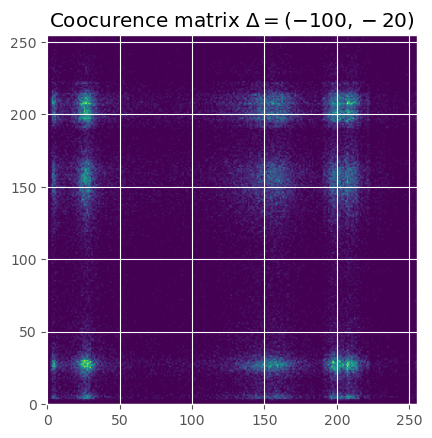

In [9]:
histo2D,_ = cooc(shuffled_ima,dx=dx,dy=dy)
plt.imshow(histo2D)
plt.ylim([0,255])
plt.title('Coocurence matrix $\Delta = (%d,%d)$'%(dx,dy));

# Compression

The aim of the compression can be to limit the size of the image, taking thus less memory in the storage device or for the transmission of the image. Depending on its use, compression can be...
- lossless, i.e. the data remains untouched after decompression,
- lossy, i.e. the data is degradated in a tolerated manner to have better compression.

Image compression uses the redundancies present in an image to limit the actual number of used bits. For example, it could be the continuity in an image, or in a sequence : this would be video compression.

## Lossless compression

Here are two examples of compression that can be used to diminish the amount of bits to be used to store/transmit some data without changing the content of the latter :
- Huffman encoding,
- Run length encoding.

### Huffman encoding

This method compresses a sequence of symbols, like the serie of graylevels from an image, in such a way that it takes advantage of the unequal distribution of the occurences of those symbols.
- If a symbol is very common, it could be interesting to store its value with a very short symbol (in terms of bits).
- If a symbol is very rare, it could use more bits without penalizing the average total message length.

In the example hereunder, four symbols have a variable frequency of occurence, from `a1`, the most frequent, to `a4` the less one.

|Illustration of the Huffman encoding lossless compression|
|:-:|
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Huffman_coding_example.svg/320px-Huffman_coding_example.svg.png" alt="Illustration of the Huffman encoding lossless compression" title="Illustration of the Huffman encoding lossless compression" width="300"/>

With the Huffman method :
1. the shortest code `0` is associated to the most frequent symbol `a1`,
2. all the other symbols will be coded by a word begining by `1`,
3. the process is recursively done for the remaining symbols.

The rarest symbol is then coded by 3 bits, whereas normaly only 2 bits are sufficient for coding 1 symbol out of 4. But statistically, because a very short word is used for the most frequent symbol, the length of the total message will be shorter.

### Run length encoding

For a binary image, the consecutive similar pixels can be grouped and encoded by only saving the length of the grouped sequence. The encoded image is then stored as a list of integers, big enough to store the longuest segment. In the following example, the longest segment is 35.
|Example of a binary image compressed with run length encoding|
|:-:|
|<img src="http://pippin.gimp.org/image_processing/images/rle.png" alt="Example of a binary image compressed with run length encoding" title="Example of a binary image compressed with run length encoding" width="300"/>

> If the image has a lot of continuous parts, this compression can be very efficient.

### Image pyramid

In order to compress an image, it is best to take advantage of the  intrinsic image properties such as the continuity. As done previously, an image can be "pyramidized" as in reducing de resolution of the image by successively dividing the dimensions of said image. The sub-sampling can either be rough or attenuated by the application of a gaussian filter before the sub-sampling. This is then called a Gaussian pyramid.

In the case of storage and compression, the concept of Laplacian pyramid is used : it is build on a Gaussian pyramid, but instead of just bluring the former image then reducing it's resolution to form the next level of the pyramid, the Laplacian pyramid uses the differences between the blurred images.

|Illustration of the concept of image pyramid|
|:-:|
|<img src="PyramidCompression.png" alt="Illustration of the concept of image pyramid" title="Illustration of the concept of image pyramid" width="500"/>|

An example of such a pyramid is given below, but without the blurring. The histogram of the image is given in red in the graph below the illustration of the process. The histogram in blue represents the content of the compressed image : it is symetrical and far less complex, making it way more easy to store !

C:\Users\HP\AppData\Local\Temp\ipykernel_8292\1236989762.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = camera()[::2,::2].astype(np.int)


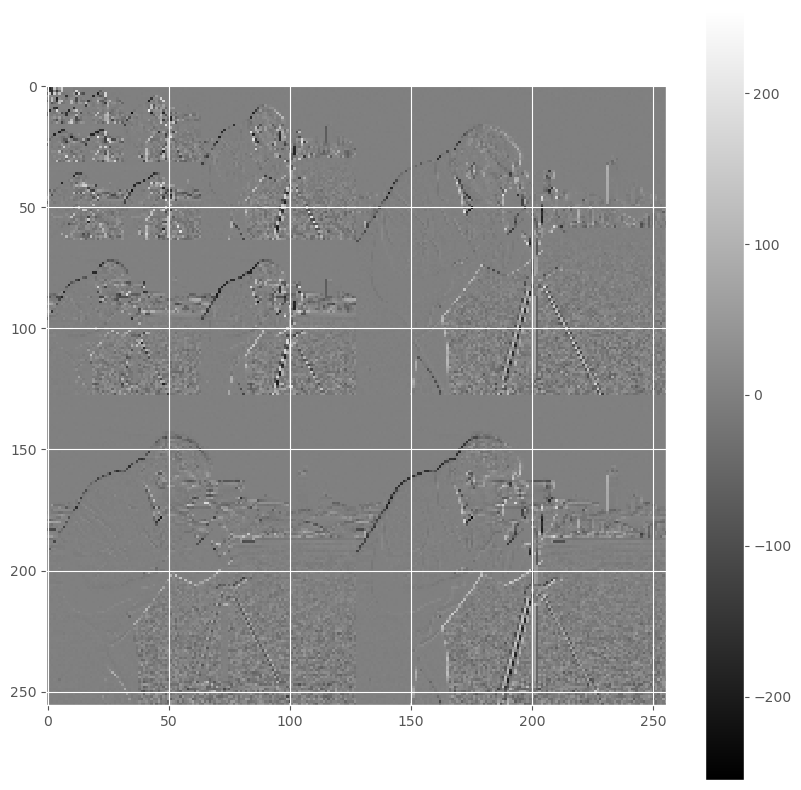

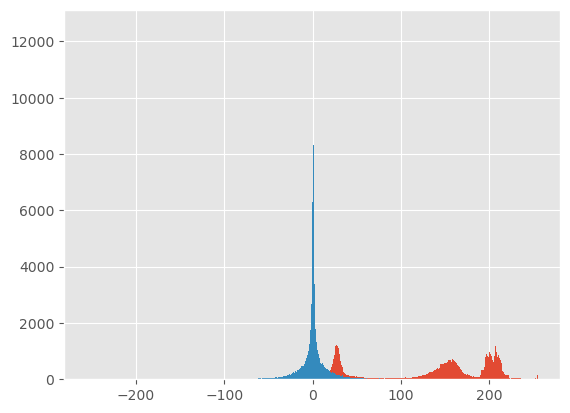

In [10]:
def split(im):
    if im.shape[0] > 1:
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a
        R = np.vstack((np.hstack((split(a),b)),np.hstack((c,d))))
    else:
        R = im
    return R

im = camera()[::2,::2].astype(np.int)
s = split(im)

fig = plt.figure(figsize=[10,10])
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar();

plt.figure()
h = plt.hist(im.flatten(),range(-256,256))[0]
h = plt.hist(s.flatten(),range(-256,256))[0]
#plt.plot(h)

## Lossy image compression

Lossy compression reduces te size of a file by discarding the less important pieces of information. However, in return for a more manageable file size, some data is permanently lost. Using lossy compression therefore requires to make a balanced judgement between :
- storage/delivery requirements,
- loading times (e.g. on the web),
- image quality.

Computers can capture a great amount of details, but the human eye not that much : there's a lot of details that could be cut. Lossy compression algorithms are about figuring out ways to remove detail without being noticable by the human eye. Well-designed lossy compression algorithms often reduce file sizes significantly before any degradation artifact could be noticed. The most widely used lossy compression algorithm is the discrete cosine transform (DCT). It is used in image difital formats such as JPEG.

# Colour representation

Colour vision is due to the ability of the human eye to discriminate three part of the spectrum thanks to specialized light sensitive cells : the cones. Digital coloured images are based on that same principle : the image is composed of the different contributions of the light in several spectral bands. For an usual picture these bands are red, green and blue : indeed for the human vision, every colour is a combination of these three.
|Gamut of the RGB colour space|
|:-:|
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/CIE-1931_diagram_in_LAB_space.svg/500px-CIE-1931_diagram_in_LAB_space.svg.png" alt="Gamut of the RGB colour space" title="Gamut of the RGB colour space" width="300"/>

## Colour systems

### RGB

This is the "classic" colour space, based on the caracteristics of the light-sensitive cones of the human sight system. The colored image, besides the two dimensions of its shape, contains a third dimension containing the colour layers, in this case red, green and blue. Each of them could also be represented as a grayscale image, the different levels of gray representing the amount of the specific colour contributing to the complete coloured image.

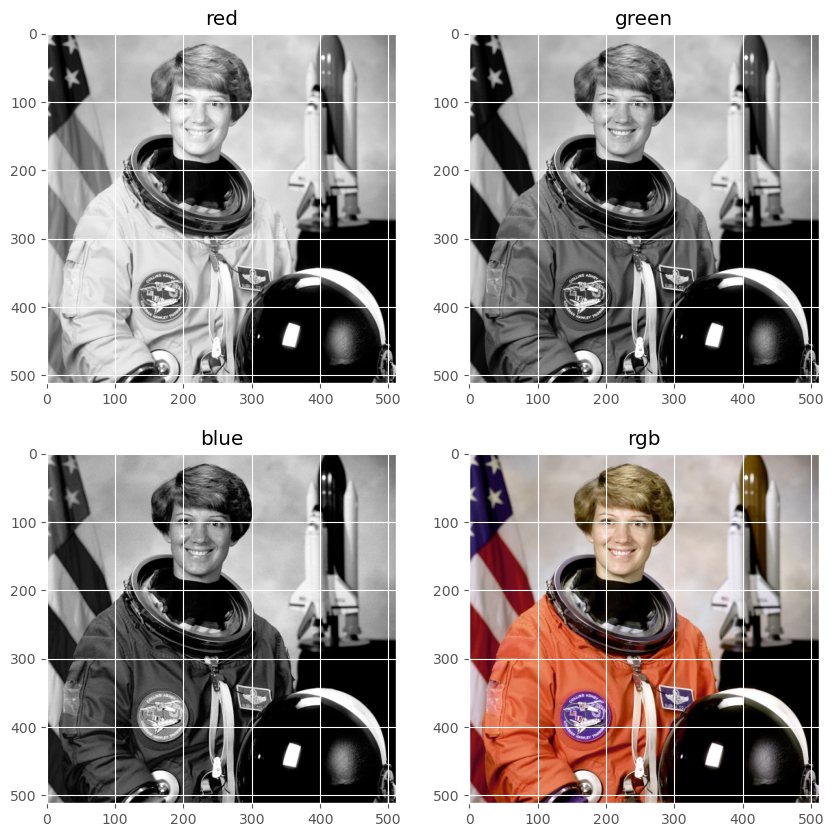

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from skimage import color
from skimage.data import astronaut,immunohistochemistry

rgb = astronaut()
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.imshow(rgb[:,:,0],cmap=cm.gray)
plt.title('red')
plt.subplot(2,2,2)
plt.imshow(rgb[:,:,1],cmap=cm.gray)
plt.title('green')
plt.subplot(2,2,3)
plt.imshow(rgb[:,:,2],cmap=cm.gray)
plt.title('blue')
plt.subplot(2,2,4)
plt.imshow(rgb,cmap=cm.gray)
plt.title('rgb');


(512, 512, 3)


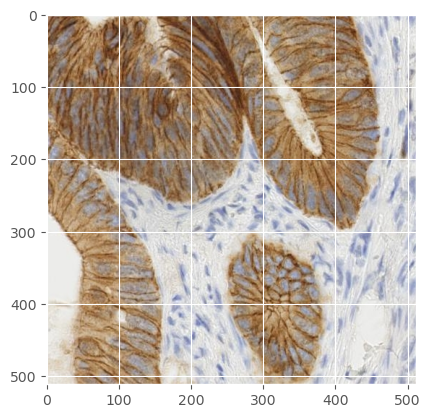

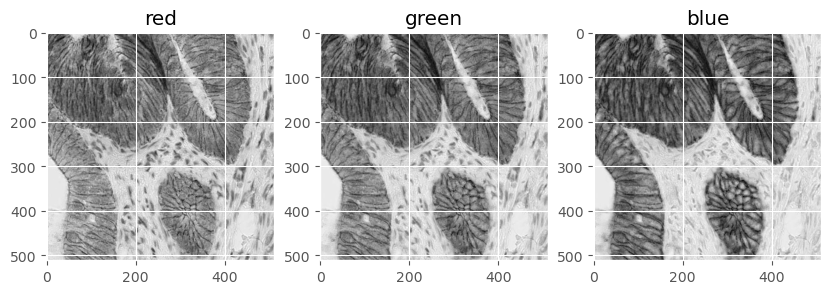

In [46]:
rgb = immunohistochemistry()

fig = plt.figure()
plt.imshow(rgb,origin='lower')
plt.gca().invert_yaxis()

#subsample
print(rgb.shape)
#rgb = rgb[::10,::10,:]

r = rgb[:,:,0]
g = rgb[:,:,1]
b = rgb[:,:,2]

r_f= r.flatten()
g_f = g.flatten()
b_f = b.flatten()

plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.title('red')
plt.imshow(r, cmap=cm.gray)
plt.subplot(1,3,2)
plt.title('green')
plt.imshow(g, cmap=cm.gray)
plt.subplot(1,3,3)
plt.title('blue')
plt.imshow(b, cmap=cm.gray)

# Try to show a 3D plot for each colour contribution

### HSV

The Hue-Saturation-Value or more simply HSV colour space is an alternative representation of the RGB color space. In this case, colours of each hue are arranged in a radial slice, around a central axis of neutral colors which ranges from black at the bottom to white at the top, which represents the brightness, also called value. The saturation represents the distance from the central axis, caracterizing the "strength" of the colour. the HSV representation is interesting for image processing because it models how different colours appear under light.
>  A colour with maximum value/brightness in HSV is analogous to shining a white light on a coloured object !

|Representation of the HSV colour space|
|:-:|
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/320px-HSV_color_solid_cylinder.png" alt="Representation of the HSV colour space" title="Representation of the HSV colour space" width="300"/>



(512, 512, 3)


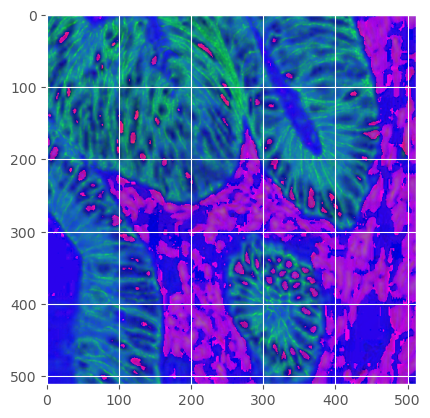

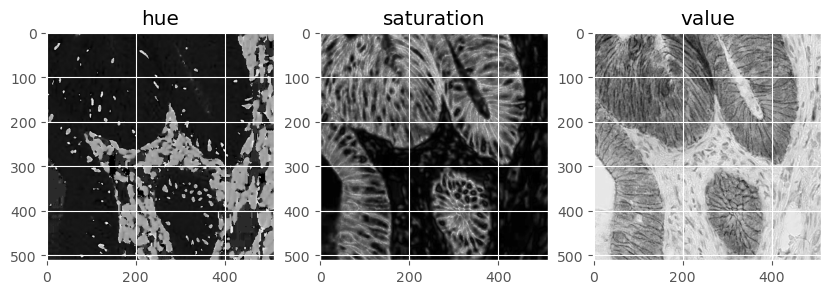

In [50]:
hsv = color.rgb2hsv(rgb)
plt.imshow(hsv)
print(hsv.shape)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

h_f = h.flatten()
s_f = s.flatten()
v_f = v.flatten()

plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.title('hue')
plt.imshow(h, cmap=cm.gray)
plt.subplot(1,3,2)
plt.title('saturation')
plt.imshow(s, cmap=cm.gray)
plt.subplot(1,3,3)
plt.title('value')
plt.imshow(v, cmap=cm.gray)

### XYZ

The XYZ colour space represents all the colour sensations visible to a human average sight. That is the XYZ colour space is a device-invariant representation of color. It is a standard reference against which many other color spaces are defined. Y is the luminance, Z is nearly equal to RGB-blue, and X is a mix of the three RGB curves chosen to be nonnegative. Setting Y as luminance has the useful result that for any given Y value, the XZ plane will contain all possible chromaticities at that luminance.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


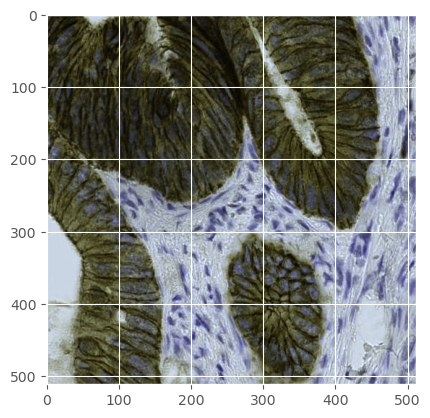

<Figure size 640x480 with 0 Axes>

In [51]:
xyz = color.rgb2xyz(rgb)
plt.imshow(xyz)
fig = plt.figure()
ax = Axes3D(fig)
x = s*np.cos(h*2*np.pi)
y = s*np.sin(h*2*np.pi)
z = v
ax.scatter(x,y,z,c=col)

th = np.linspace(0,6.28,200)
ax.scatter(np.cos(th),np.sin(th),0,c='k',s=.1);

# Don't know what's happening...